In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

import os
from skimage import io

from skimage.restoration import (denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.measure import compare_psnr

In [3]:
pic=io.imread('horse-web.png',as_gray=True)
print(pic.shape)

(1116, 1116)


In [4]:
sigma = 0.12
noisy = random_noise(pic, var=sigma**2)
noisy.resize(pic.shape)
print(noisy.shape)

(1116, 1116)


In [5]:
sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)

In [6]:
print("Estimated Gaussian noise standard deviation = {}".format(sigma_est))


Estimated Gaussian noise standard deviation = 0.1146408058244768


In [7]:
im_bayes = denoise_wavelet(noisy,method='BayesShrink', mode='soft')
print(im_bayes.shape)

(1116, 1116)


C:\ProgramData\Anaconda3\lib\site-packages\skimage\restoration\_denoise.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return pywt.waverecn(denoised_coeffs, wavelet)[original_extent]


In [8]:
im_visushrink = denoise_wavelet(noisy,method='VisuShrink', mode='soft',
                                sigma=sigma_est)
im_visushrink2 = denoise_wavelet(noisy,method='VisuShrink', mode='soft',
                                 sigma=sigma_est/2)
im_visushrink4 = denoise_wavelet(noisy,method='VisuShrink', mode='soft',
                                 sigma=sigma_est/4)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\restoration\_denoise.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return pywt.waverecn(denoised_coeffs, wavelet)[original_extent]


In [9]:
psnr_noisy = compare_psnr(pic , noisy)
psnr_bayes = compare_psnr(pic , im_bayes)
psnr_visushrink = compare_psnr(pic, im_visushrink)
psnr_visushrink2 = compare_psnr(pic, im_visushrink2)
psnr_visushrink4 = compare_psnr(pic, im_visushrink4)

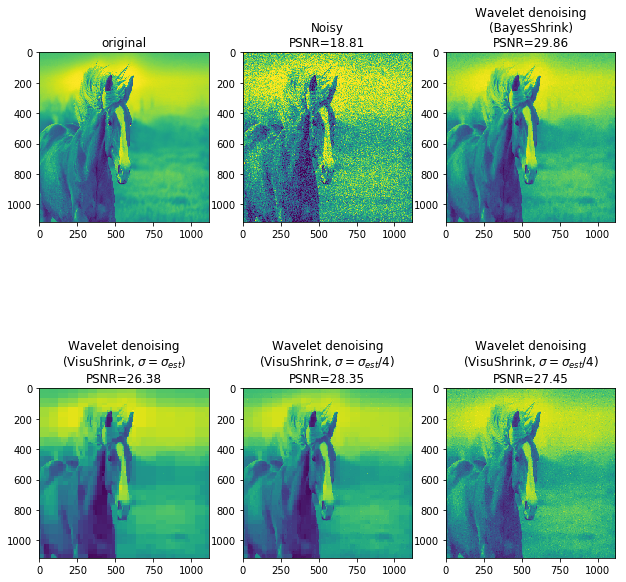

In [10]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)

x=plt.subplot(231)
x.imshow(pic)
plt.title('original')
y=plt.subplot(232)
y.imshow(noisy)
plt.title('Noisy\nPSNR={:0.4g}'.format(psnr_noisy))
z=plt.subplot(233)
z.imshow(im_bayes)
plt.title( 'Wavelet denoising\n(BayesShrink)\nPSNR={:0.4g}'.format(psnr_bayes))
t=plt.subplot(234)
t.imshow(im_visushrink)
plt.title('Wavelet denoising\n(VisuShrink, $\sigma=\sigma_{est}$)\n'
     'PSNR=%0.4g' % psnr_visushrink)
l=plt.subplot(235)
l.imshow(im_visushrink2)
plt.title('Wavelet denoising\n(VisuShrink, $\sigma=\sigma_{est}/4$)\n'
     'PSNR=%0.4g' % psnr_visushrink2)
l=plt.subplot(236)
l.imshow(im_visushrink4)
plt.title('Wavelet denoising\n(VisuShrink, $\sigma=\sigma_{est}/4$)\n'
     'PSNR=%0.4g' % psnr_visushrink4)

plt.show()